# **Pertemuan 12 - Continous Random Variables 2**

Introduction to Probability Course - Sekolah Data - Pacmann Academy

**Outline**

1. Case 1 - Conditional PDF on House Price
2. Case 2 - Joint Continouse Variable on House Price
3. Case 3 - Conditional PDF on Other Variable

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
# load data
import pandas as pd
import numpy as np
import itertools
import random
from collections import Counter

# visualization
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

from src.module_python_12 import joint_plot_3d
from src.module_python_12 import joint_plot_cond_3d

## **Case Study 1: Conditional PDF**
___


### Load House Price Dataset

[Source](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

In [3]:
house_price = pd.read_csv("C:/Users/farha/Documents/pacmann/02_probability/dataset/week-5-6-train.csv")
house_price

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### PDF Sales Price

In [5]:
# how to plot distribution using seaborn
# how to use

# sns.distplot(data["column_name"], axlabel = Labels, kde = "use True to see the estimation of pdf values")

C:\Users\farha\AppData\Local\Temp\ipykernel_3876\4292676539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_price['SalePrice'], axlabel='Sale', kde=True)


<Axes: xlabel='Sale', ylabel='Density'>

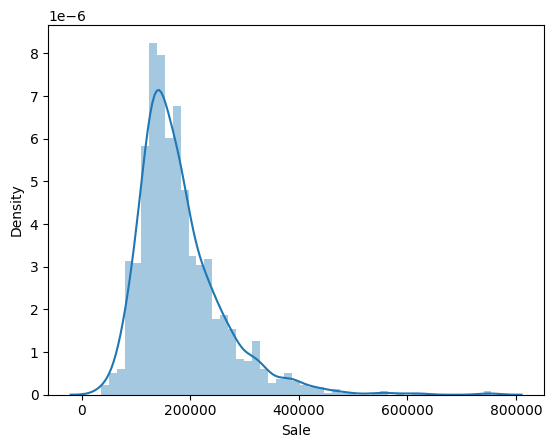

In [4]:
sns.distplot(house_price['SalePrice'], axlabel='Sale', kde=True)

### Conditional PDF Sales Price

Siapkan data dengan "condition"

In [5]:
# condition = (data[column_name] </>/= xxx)
# data[conditional][column_name]

condition = (house_price['SalePrice']>200000) & (house_price['SalePrice']<400000)
conditional_price = house_price[condition]['SalePrice']

C:\Users\farha\AppData\Local\Temp\ipykernel_3876\2906864595.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(conditional_price, axlabel='Sale', kde=True)


<Axes: xlabel='Sale', ylabel='Density'>

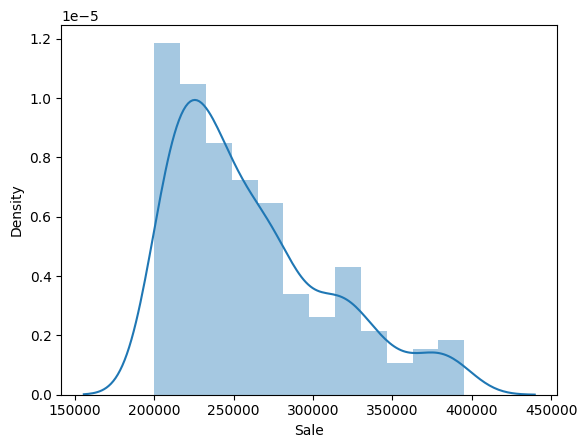

In [6]:
sns.distplot(conditional_price, axlabel='Sale', kde=True)

Bandingkan distribusi data price dengan data price ber'kondisi'

C:\Users\farha\AppData\Local\Temp\ipykernel_3876\3548038172.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(house_price['SalePrice'], axlabel='Sale', kde=True)
C:\Users\farha\AppData\Local\Temp\ipykernel_3876\3548038172.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(conditio

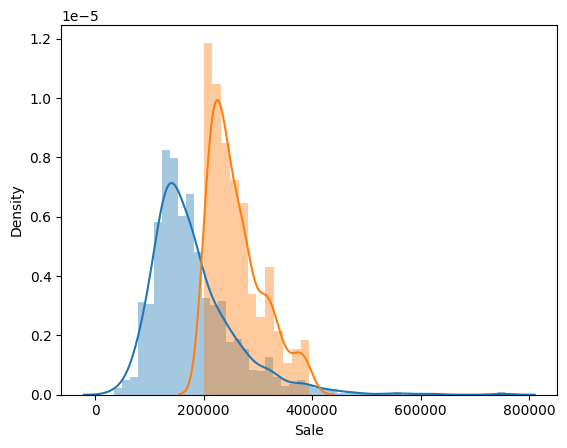

In [7]:
# plotting saleprice and conditional saleprice distribution on the same figure
fig = sns.distplot(house_price['SalePrice'], axlabel='Sale', kde=True)
fig = sns.distplot(conditional_price, axlabel='Sale', kde=True)
plt.show()

- PDF yang dihasilkan dari dari conditional price akan cenderung 'naik' grafik nya, karna rentang conditional lebih kecil dari yang non-conditional, sehingga untuk membuat luasan kurva (integral dari pdf pada semua rentang conditional) sama dengan 1. butuh nilai pdf yang tinggi pula
- nilai PDF bukanlah probabilitas, maka dari itu kita nilai nilai nya bisa lebih dari 1

## **Case Study 2: Conditional Expectation**
___


### Conditional Expectation Sales Price

In [8]:
price = house_price['SalePrice']
condition = (house_price['SalePrice']>200000) & (house_price['SalePrice']<400000)
conditional_price = house_price[condition]['SalePrice']

C:\Users\farha\AppData\Local\Temp\ipykernel_3876\3902397712.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(price, axlabel='Sale', kde=True)
C:\Users\farha\AppData\Local\Temp\ipykernel_3876\3902397712.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(conditional_price, axlabel=

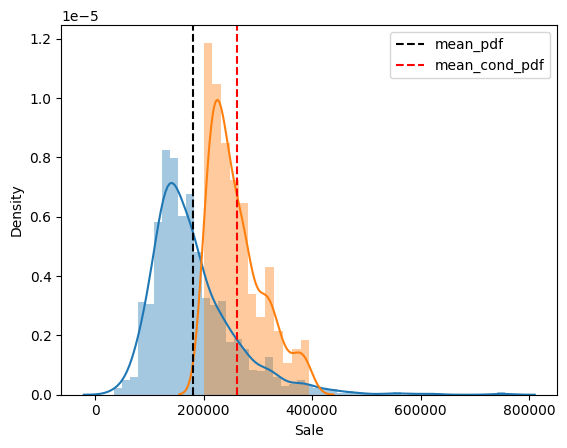

In [9]:
# plotting expectations & distributions of saleprice and conditional saleprice on the same figure

# plot distribution 
fig = sns.distplot(price, axlabel='Sale', kde=True)
fig = sns.distplot(conditional_price, axlabel='Sale', kde=True)

# plot lines of their mean (expected value)
line1 = plt.axvline(price.mean(), color="k", linestyle="--", label = "mean_pdf")
line2 = plt.axvline(conditional_price.mean(), color="r", linestyle="--", label = "mean_cond_pdf")

# add legend  
first_legend = plt.legend(handles=[line1,line2], loc=1)
plt.show()

nilai mean (E[X]) pada price dan conditional price akan berbeda

## **Case Study 3: Joint Continous RV**
___


See data columns that has numerical value

In [10]:
house_price.select_dtypes(include=["int","float"]).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Joint Continous RV (Garage Living Area and Garage Area)

- Di bagian tengah adalah representasi kontur joint distribusi nya
- Bagian atas dan kanan adalah marginal distributionnya

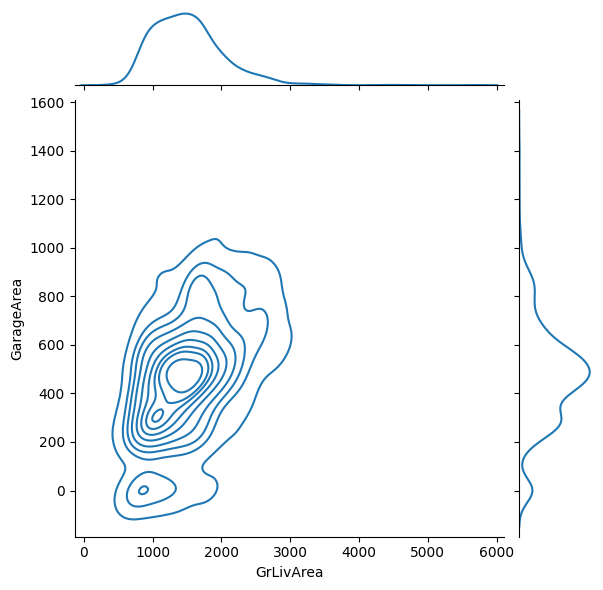

In [11]:
sns.jointplot(x='GrLivArea', y='GarageArea', data=house_price, kind='kde')

kita bisa melihat lebih jelas joint distributionnya dengan melakukan 3d plot, peluang pada joint distribution tidak berbentuk luasan namun berbentuk volume

-196.79999999999995 6172.8 -141.8 1559.8


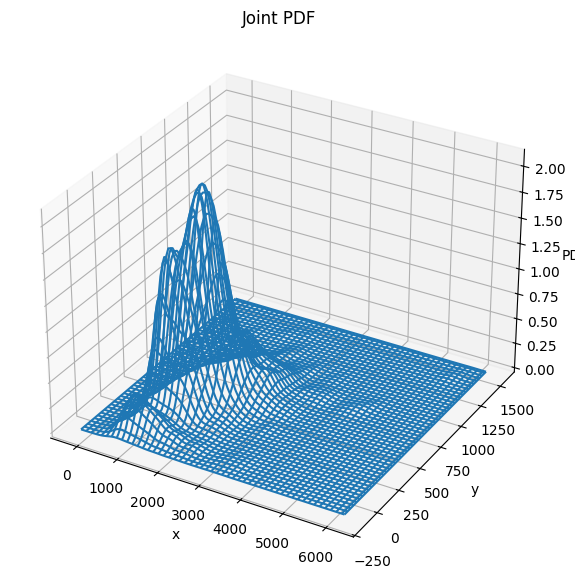

In [12]:
joint_plot_3d(x = house_price["GrLivArea"], y = house_price["GarageArea"])

### Exercise - Explore Joint DIstribution on Another Variables or Other Cases

<details>
    <summary><b>Klik untuk melihat kunci jawaban</b></summary>

```python
# Other Cases
tips = sns.load_dataset("tips")

sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

joint_plot_3d(x = tips["total_bill"], y = tips["tip"])
```

</details>

---

## **Case Study 4: Conditional PDF on other RV**
___


- Dalam Case Study 1 kita melihat conditional pdf hanya pada 1 variable saja, yaitu price, disini kita lihat bagaimana jika conditional nya ada pada variable lain
- Misalnya kita ingin melihat distribusi dari GrLivArea dan GarageArea dengan kondisi pada GarageArea

In [13]:
condition = (house_price['GarageArea']>400) & (house_price['GarageArea']<800)
grlivarea_given_gragearea = house_price[condition]['GrLivArea']
cond_gragearea = house_price[condition]['GarageArea']

Plot GrLivArea conditional pdf on GarageArea

C:\Users\farha\AppData\Local\Temp\ipykernel_3876\3794573898.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(grlivarea_given_gragearea, axlabel='GrLivArea', kde=True)


<Axes: xlabel='GrLivArea', ylabel='Density'>

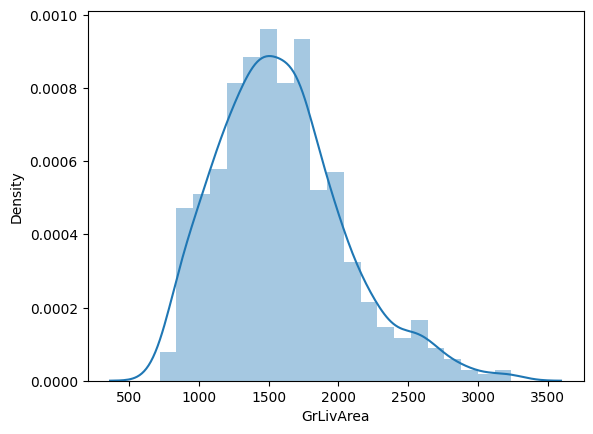

In [14]:
sns.distplot(grlivarea_given_gragearea, axlabel='GrLivArea', kde=True)

See their joint distribution

- Before conditional

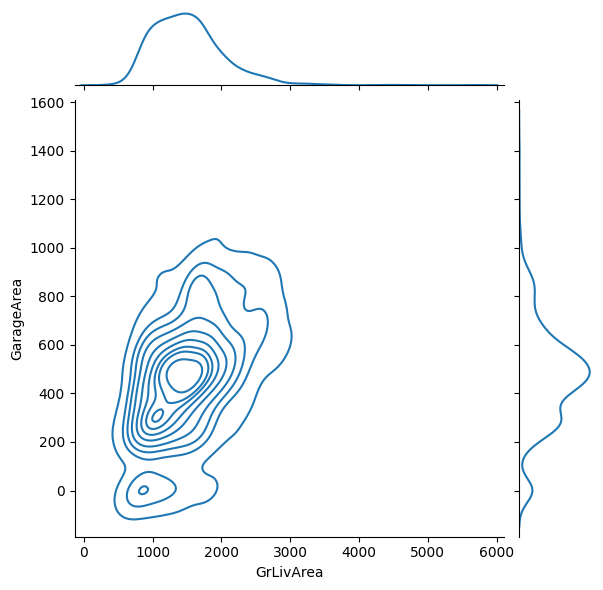

In [15]:
sns.jointplot(x=house_price['GrLivArea'], y=house_price['GarageArea'], kind='kde')

- After conditional

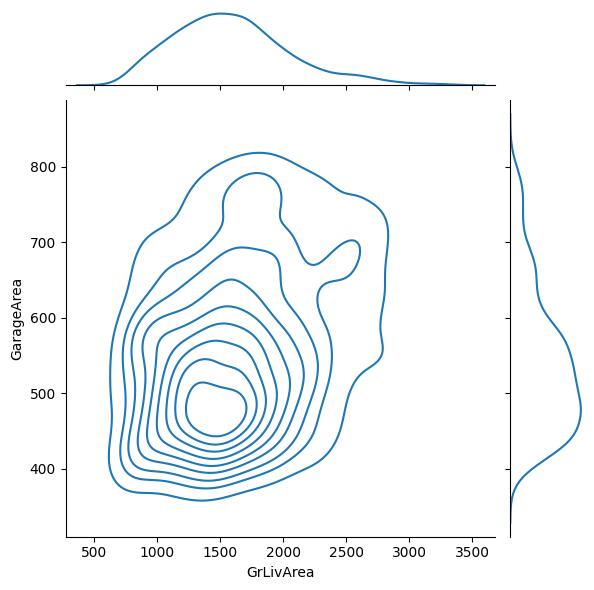

In [16]:
sns.jointplot(x=grlivarea_given_gragearea, y=cond_gragearea, kind='kde')

- Bentuk joint distribution nya akan berbeda dan range data yang dicakup juga berbeda

Coba kita bandingkan dalam bentuk 3d.

- Before conditional

-141.8 1559.8 -196.79999999999995 6172.8


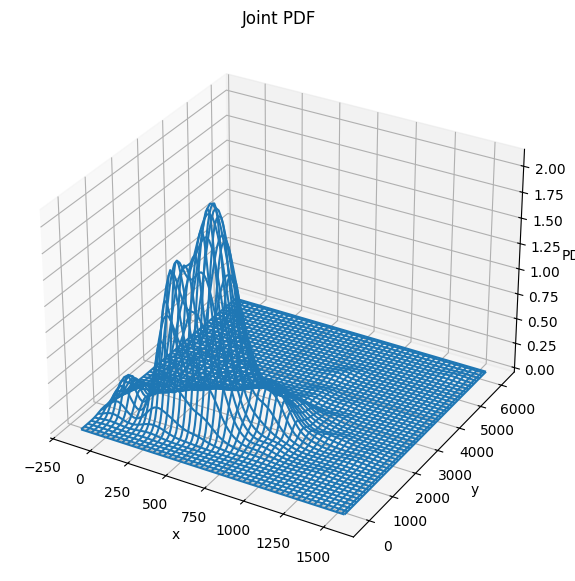

In [17]:
joint_plot_3d(x = house_price['GarageArea'], y = house_price['GrLivArea'])

- After conditional

362.6 835.4 468.2 3489.8


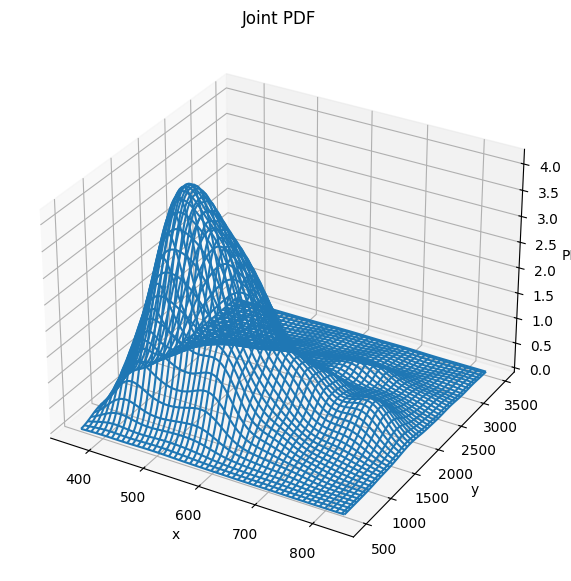

In [18]:
joint_plot_3d(x = cond_gragearea, y = grlivarea_given_gragearea)

Jika di plot dalam satu ruang

-141.8 1559.8 -196.79999999999995 6172.8
362.6 835.4 468.2 3489.8


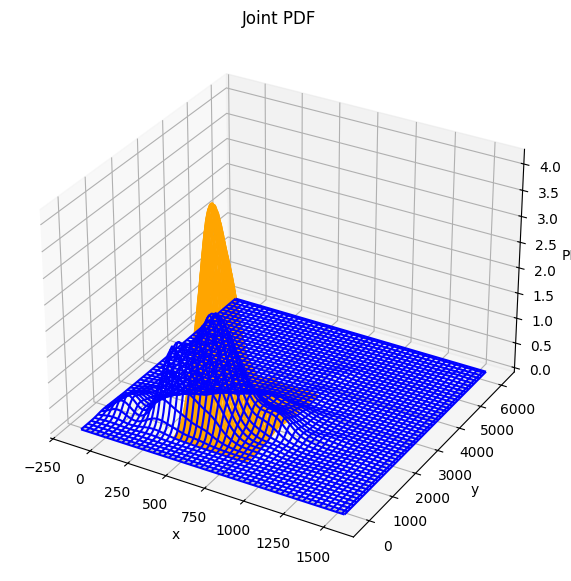

In [19]:
condition = (house_price['GarageArea']>400) & (house_price['GarageArea']<800)
grlivarea_given_gragearea = house_price[condition]['GrLivArea']
cond_gragearea = house_price[condition]['GarageArea']
joint_plot_cond_3d(x = house_price["GarageArea"], y = house_price["GrLivArea"],x_cond = cond_gragearea, y_cond = grlivarea_given_gragearea)

- Joint distribution yang dihasilkan dari dari conditional (warna orange) akan cenderung 'naik' grafik nya, karna rentang conditional lebih kecil dari yang non-conditional, sehingga untuk membuat volume kurva (double integral dari pdf x dan y pada semua rentang conditional) sama dengan 1. butuh 'tinggi' pdf yang besar pula
- Nilai PDF dalam kurva joint distribution ini juga bukanlah probabilitas, maka dari itu kita nilai nilai nya bisa lebih dari 1